<a href="https://colab.research.google.com/github/m2gu3el/Bitcoin-Price-Prediction/blob/main/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import metrics
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading and Reading the Dataset
###  Dataset downloaded from yfinance->https://finance.yahoo.com/quote/BTC-USD/history/


In [4]:
df= pd.read_csv('/content/drive/MyDrive/BTC-USD.csv', parse_dates=['Date'], index_col=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800
2014-12-13,352.381012,352.381012,346.588013,347.376007,347.376007,11675900
2014-12-14,346.726990,353.316010,345.417999,351.631989,351.631989,12415200
2014-12-15,351.360992,351.815002,344.933990,345.345001,345.345001,17264200
2014-12-16,345.673004,345.859009,327.062012,327.062012,327.062012,30864900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2014-12-12 to 2023-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3288 non-null   float64
 1   High       3288 non-null   float64
 2   Low        3288 non-null   float64
 3   Close      3288 non-null   float64
 4   Adj Close  3288 non-null   float64
 5   Volume     3288 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.8 KB


In [6]:
len(df) # Number of days we have the data of!

3288

In [7]:
btc_price = pd.DataFrame(df[["Open"]]).rename(columns={"Open": "Price"})
btc_price.head()


,Price
Date,
2014-12-12,350.833008
2014-12-13,352.381012
2014-12-14,346.726990
2014-12-15,351.360992
2014-12-16,345.673004


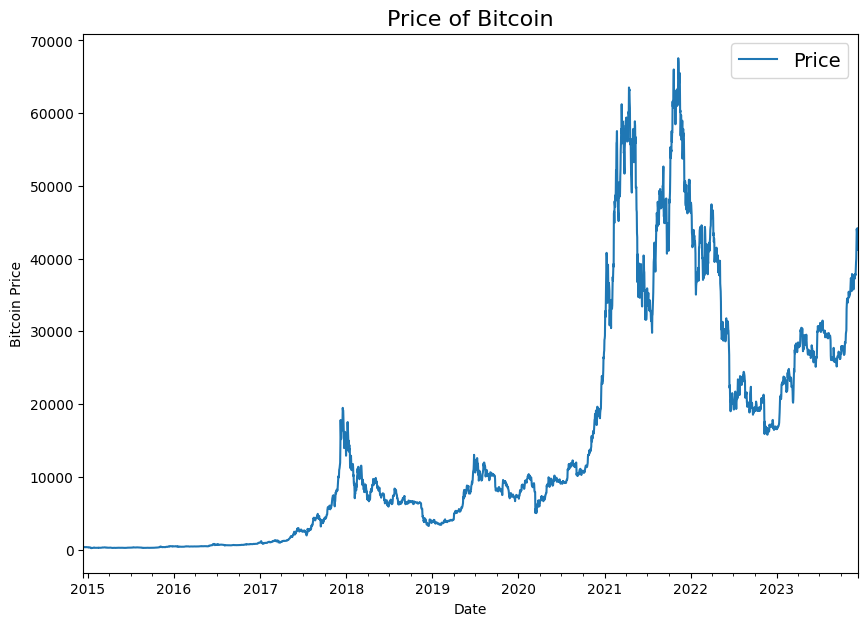

In [8]:
import matplotlib.pyplot as plt #Plotting our bitcoin prices chart
btc_price.plot(figsize=(10, 7))
plt.ylabel("Bitcoin Price")
plt.title("Price of Bitcoin", fontsize=16)
plt.legend(fontsize=14);

In [9]:
# Bitcoin Date array
timesteps= btc_price.index.to_numpy()
prices= btc_price['Price'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

split = int(0.8 * len(prices))

X_train, y_train = timesteps[:split], prices[:split]
X_test, y_test = timesteps[split:], prices[split:]

len(X_train), len(X_test)

(2630, 658)

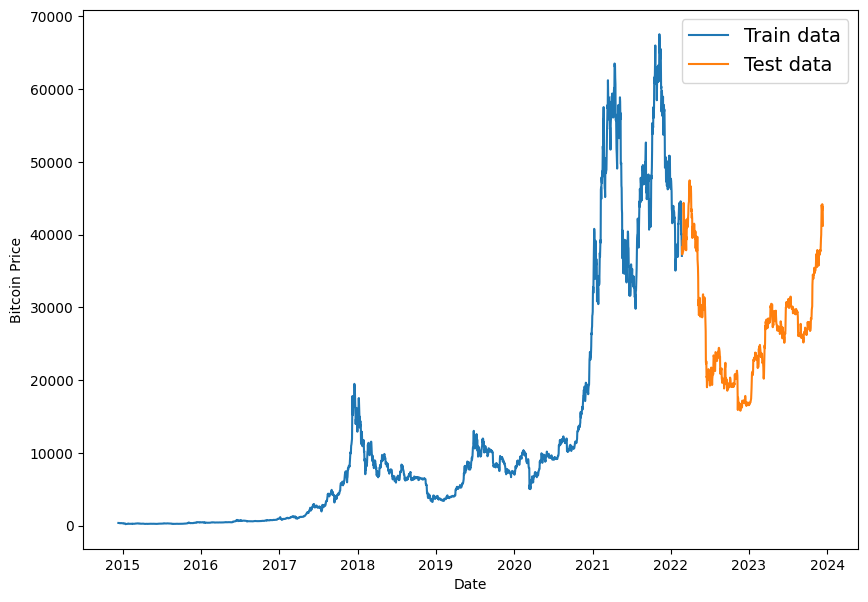

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(X_train, y_train, label="Train data")
plt.plot(X_test, y_test, label="Test data")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=14)
plt.show();
plt.savefig('traintestplot.png')

In [14]:
#Plotting function
def plot_ts(timesteps, values, format="-", start=0, end=None, label=None,file=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Bitcoin Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)
  if file:
    plt.savefig(file)
    plt.close()


In [16]:
plot_ts(X_train, y_train, start=1000, format="-", label="Training Data",file='train.png')

In [17]:
plot_ts(X_test, y_test, format="-", label="Testing Data",file='test.png')

# Models
0. Naive
1. Dense models with different horizons and Window Sizes
2. Conv1D
3. LSTM
4. multivariate data models
5. N-Beats

Horizon- Number of timesteps in future that we will predict.

Window Size- Number of timesteps used to predict horizon.

# Metrics
1. MAE (mean absolute error)
2. MSE (mean squarred error)
2. RMSE (root mean square error)     
3. MAPE (mean absolute percentage error)
4. MASE (mean absolute scaled error)

In [19]:
# MASE implementation
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  # Assuming no seasonality
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # MAE of naive with no seasonality
  mae_naive=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive

In [20]:
from tensorflow.keras import metrics

In [21]:
# Making a function for all errors together
def evalutes(y_true, y_pred):
  y_true=tf.cast(y_true, dtype=tf.float32)
  y_pred=tf.cast(y_pred, dtype=tf.float32)

  mae = metrics.mean_absolute_error(y_true, y_pred)
  mse = metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mape": mape.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mase": mase.numpy()}



# Modelling Experiments

### Model-0-> Naive

$$\hat{y}_{t}=y_{t-1}$$

**Naive forecasting is one of the most basic approaches in Demand Forecasting. It forecasts Future Demand using previously observed sales data and analytics.**




In [22]:


naive_forecast=y_test[:-1]
naive_forecast

array([38285.28125 , 37278.566406, 38333.746094, 39213.082031,
       39098.699219, 37706.      , 43194.503906, 44357.617188,
       43925.195313, 42458.140625, 39148.449219, 39404.199219,
       38429.304688, 38059.902344, 38742.816406, 41974.070313,
       39439.96875 , 38794.464844, 38884.726563, 37846.316406,
       39664.25    , 39335.570313, 41140.84375 , 40944.839844,
       41794.648438, 42191.40625 , 41246.132813, 41074.105469,
       42364.378906, 42886.652344, 43964.546875, 44349.859375,
       44505.355469, 46821.851563, 47100.4375  , 47456.898438,
       47062.148438, 45554.164063, 46285.5     , 45859.128906,
       46445.273438, 46624.507813, 45544.355469, 43207.5     ,
       43505.136719, 42282.078125, 42781.089844, 42201.039063,
       39533.714844, 40123.570313, 41160.21875 , 39939.402344,
       40552.316406, 40417.777344, 39721.203125, 40828.175781,
       41501.746094, 41371.515625, 40525.863281, 39738.722656,
       39478.375   , 39472.605469, 40448.421875, 38120.

In [23]:
y_test[-10:]

array([39472.207031, 39978.628906, 41986.265625, 44080.023438,
       43769.132813, 43293.136719, 44180.019531, 43728.382813,
       43792.019531, 41238.734375])

In [24]:
 naive_forecast[-10:]

array([38689.277344, 39472.207031, 39978.628906, 41986.265625,
       44080.023438, 43769.132813, 43293.136719, 44180.019531,
       43728.382813, 43792.019531])

In [25]:
#Ploting naive forecast
plt.figure(figsize=(10,10))
plot_ts(X_test, y_test, label="Test Data")
plot_ts(X_test[1:], naive_forecast, label="Naive Forecast",file='naive.png')

In [26]:
naive_results = evalutes(y_test[1:], naive_forecast)
naive_results

{'mae': 516.13196,
 'mape': 1.8850052,
 'mse': 654502.3,
 'rmse': 809.0132,
 'mase': 1.001451}

### Model 1/1'- Dense models with different Horizons and Windows

1. Window=7, Horizon=1
2. window=30, Horizon=7

In [27]:
Horizon_1=1 # To be predicted
Window_size_1=7 # Used for prediction

In [28]:
def get_data(x, horizon):
  return x[:, :-horizon], x[:, -horizon:]



In [29]:
# Testing the function
test_win, test_pred= get_data(tf.expand_dims(tf.range(8), axis=0), 1)
print(f'Window: {test_win}- label {test_pred}')

Window: [[0 1 2 3 4 5 6]]- label [[7]]


####But we want something of the type
>[0,1,2,3,4,5,6]->[7]

>[1,2,3,4,5,6,7]->[8]

>[2,3,4,5,6,7,8]->[9]

In [30]:
# Creating fucntion to get windows
def make_windows(x, window_size, horizon):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes= window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array=x[window_indexes]

  windows, labels = get_data(windowed_array, Horizon_1)

  return windows, labels

In [31]:
windows, labels = make_windows(prices, Window_size_1, Horizon_1)

In [32]:
# Some windows and labels
for i in range(10):
  print(f'window: {windows[i]} > label: {labels[i]}')


window: [350.833008 352.381012 346.72699  351.360992 345.673004 326.855011
 319.785004] > label: [311.178986]
window: [352.381012 346.72699  351.360992 345.673004 326.855011 319.785004
 311.178986] > label: [317.618988]
window: [346.72699  351.360992 345.673004 326.855011 319.785004 311.178986
 317.618988] > label: [329.542999]
window: [351.360992 345.673004 326.855011 319.785004 311.178986 317.618988
 329.542999] > label: [321.067993]
window: [345.673004 326.855011 319.785004 311.178986 317.618988 329.542999
 321.067993] > label: [332.016998]
window: [326.855011 319.785004 311.178986 317.618988 329.542999 321.067993
 332.016998] > label: [334.38501]
window: [319.785004 311.178986 317.618988 329.542999 321.067993 332.016998
 334.38501 ] > label: [322.286011]
window: [311.178986 317.618988 329.542999 321.067993 332.016998 334.38501
 322.286011] > label: [319.152008]
window: [317.618988 329.542999 321.067993 332.016998 334.38501  322.286011
 319.152008] > label: [327.583008]
window: [329

#### Turning the windows and labels in train and test sets

In [33]:
def train_test_sets(windows, labels, test_split=0.2):
  split_size=int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [34]:
train_windows, test_windows, train_labels, test_labels = train_test_sets(windows, labels)
len(train_windows), len(train_labels)

(2624, 2624)

In [35]:
# Making modelling checkpoint callback to save the best performance

import os

def create_modelcheckpoint(model_name, save_path='modelling_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbose=0, save_best_only=True)


In [36]:
# Model 1. Dense Model(window=7, horizon=1)

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.Dense(Horizon_1, activation="linear")
], name='model_1')

model_1.compile(loss='mae', optimizer='adam', metrics='mae')


In [37]:
model_1.fit(train_windows, train_labels, epochs=50, batch_size=32, validation_data=(test_windows, test_labels),
            callbacks=[create_modelcheckpoint(model_1.name)])

Epoch 1/50
82/82 [==============================] - 3s 16ms/step - loss: 2151.4595 - mae: 2151.4595 - val_loss: 956.3666 - val_mae: 956.3666
Epoch 2/50
82/82 [==============================] - 1s 10ms/step - loss: 605.6282 - mae: 605.6282 - val_loss: 896.4820 - val_mae: 896.4820
Epoch 3/50
82/82 [==============================] - 0s 4ms/step - loss: 544.8000 - mae: 544.8000 - val_loss: 1198.4387 - val_mae: 1198.4387
Epoch 4/50
82/82 [==============================] - 1s 11ms/step - loss: 540.1852 - mae: 540.1852 - val_loss: 729.7848 - val_mae: 729.7848
Epoch 5/50
82/82 [==============================] - 1s 10ms/step - loss: 471.8998 - mae: 471.8998 - val_loss: 676.2839 - val_mae: 676.2839
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 434.5920 - mae: 434.5920 - val_loss: 1060.8545 - val_mae: 1060.8545
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 502.5482 - mae: 502.5482 - val_loss: 972.0673 - val_mae: 972.0673
Epoch 8/50
82/82 [======

In [38]:
model_1= tf.keras.models.load_model("/content/modelling_experiments/model_1")
model_1.evaluate(test_windows, test_labels)
model_1.save('model_1.h5')

21/21 [==============================] - 0s 2ms/step - loss: 523.3906 - mae: 523.3906


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
def make_preds(model, input_data):
  """
  model: trained model
  input_data: windowed input data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [40]:
model_1_preds = make_preds(model_1, test_windows)
tf.squeeze(test_labels[:10]), model_1_preds[:10]

21/21 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([37278.566406, 38333.746094, 39213.082031, 39098.699219,
        37706.      , 43194.503906, 44357.617188, 43925.195313,
        42458.140625, 39148.449219])>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([38020.355, 37383.277, 37930.324, 39022.63 , 39111.707, 37860.83 ,
        42310.51 , 44279.35 , 43947.027, 42796.387], dtype=float32)>)

In [41]:
model_1_results=evalutes(tf.squeeze(test_labels[:]), model_1_preds[:])
print(f' Dense model 1 results->{model_1_results}'), print(f'Naive model results-> {naive_results}')

 Dense model 1 results->{'mae': 523.3906, 'mape': 1.910553, 'mse': 667692.25, 'rmse': 817.1244, 'mase': 1.015535}
Naive model results-> {'mae': 516.13196, 'mape': 1.8850052, 'mse': 654502.3, 'rmse': 809.0132, 'mase': 1.001451}


(None, None)

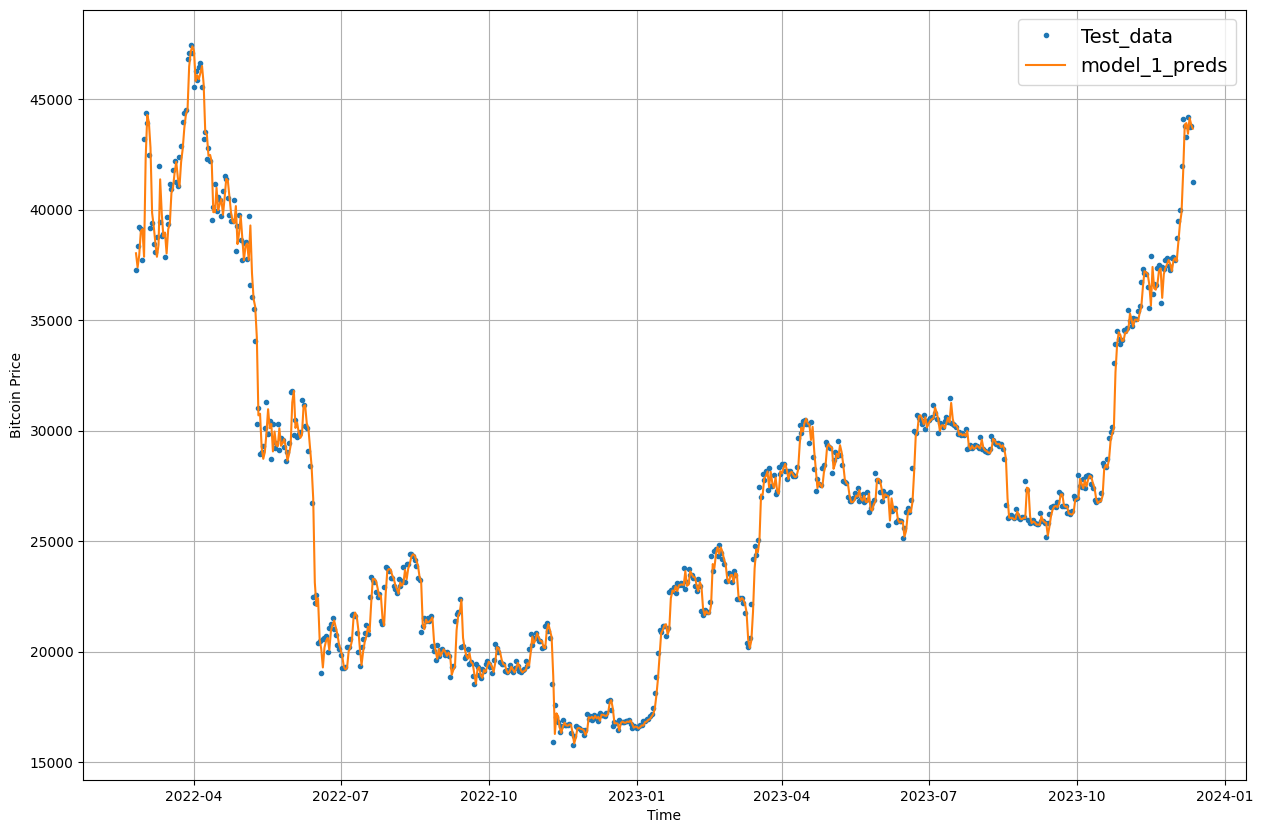

In [42]:
# Plotting our predictions
plt.figure(figsize=(15, 10))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_ts(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format=".",label="Test_data")
plot_ts(timesteps=X_test[-len(test_windows):], values=model_1_preds, format="-", label="model_1_preds")
plt.savefig('model_1_preds.png')

### Model 1' (model_1d)
Horizon=7
Window Size=30

In [43]:
Horizon_2=7
Window_size_2=30

In [44]:
windows, labels = make_windows(prices, Window_size_2, Horizon_2)
len(windows)

3252

In [45]:
train_windows, test_windows, train_labels, test_labels = train_test_sets(windows=windows, labels=labels)
len(train_windows)

2601

In [46]:
# Building the model
tf.random.set_seed(42)

model_1d = tf.keras.Sequential([
           layers.Dense(512, activation='relu'),
           layers.Dense(64, activation='relu'),
           layers.Dense(Horizon_2, activation='linear')
], name='model_1d')

model_1d.compile(optimizer='adam', loss='mae')

In [47]:
model_1d.fit(train_windows, train_labels, batch_size=128,epochs=50, verbose=1, validation_data=(test_windows, test_labels), callbacks=[create_modelcheckpoint(model_1d.name)])

Epoch 1/50
21/21 [==============================] - 2s 35ms/step - loss: 4085.2490 - val_loss: 2768.5032
Epoch 2/50
21/21 [==============================] - 1s 38ms/step - loss: 1115.8170 - val_loss: 1421.4521
Epoch 3/50
21/21 [==============================] - 1s 26ms/step - loss: 775.5438 - val_loss: 1155.0802
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 726.4102 - val_loss: 1188.1122
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 698.8677 - val_loss: 1632.2112
Epoch 6/50
21/21 [==============================] - 1s 26ms/step - loss: 681.8028 - val_loss: 1055.3267
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 601.3326 - val_loss: 1719.6719
Epoch 8/50
21/21 [==============================] - 1s 26ms/step - loss: 610.6239 - val_loss: 965.5872
Epoch 9/50
21/21 [==============================] - 0s 4ms/step - loss: 550.7975 - val_loss: 1451.8499
Epoch 10/50
21/21 [==============================] - 1s 32ms/step -

In [48]:
model_1d.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 6ms/step - loss: 702.0583


702.0582885742188

In [49]:

# Loading the best version of model_1d and evaluate
model_1d = tf.keras.models.load_model("/content/modelling_experiments/model_1d")
model_1d.evaluate(test_windows, test_labels)
model_1d.save('model_1d.h5')

21/21 [==============================] - 1s 3ms/step - loss: 640.7606


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
model_1d_preds=make_preds(model_1d, test_windows)
model_1d_preds.shape, model_1_preds.shape

21/21 [==============================] - 0s 4ms/step


(TensorShape([651, 7]), TensorShape([657]))

In [53]:
model_1d_results = evalutes(y_true=tf.squeeze(test_labels),y_pred= model_1d_preds )

InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:Sub] name: 

#### We need to change our evalutes function accordingly to adjust for the horizon size


In [54]:
# New evalutes function
def evalutes_1d(y_true, y_pred):
    y_true = tf.squeeze(tf.cast(y_true, dtype=tf.float32))

    y_pred_for_horizon = tf.squeeze(tf.cast(y_pred[:, Horizon_2 - 1], dtype=tf.float32))

    mae = metrics.mean_absolute_error(y_true, y_pred_for_horizon)
    mse = metrics.mean_squared_error(y_true, y_pred_for_horizon)
    rmse = tf.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_true, y_pred_for_horizon)
    mase = mean_absolute_scaled_error(y_true, y_pred_for_horizon)

    return {
        "mae": mae.numpy(),
        "mape": mape.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mase": mase.numpy()
    }


In [55]:
model_1d_results= evalutes_1d(tf.squeeze(test_labels[:]), model_1d_preds[:])
model_1d_results

{'mae': 671.014,
 'mape': 2.504513,
 'mse': 899741.7,
 'rmse': 948.5471,
 'mase': 1.3297583}

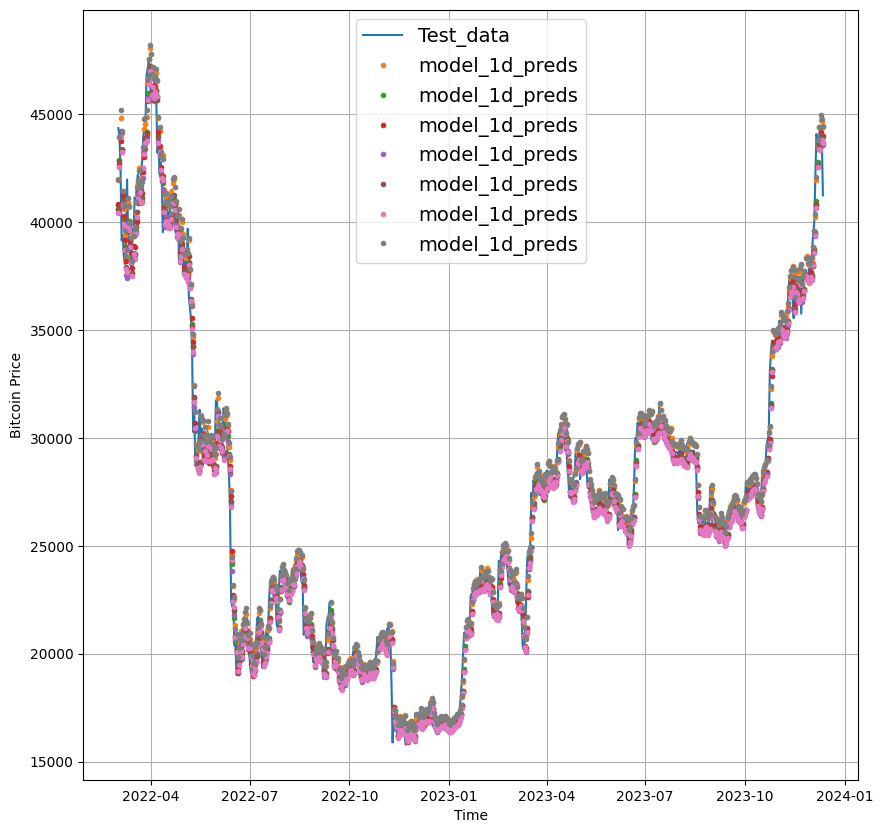

In [56]:
plt.figure(figsize=(10, 10))
plot_ts(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],  label="Test_data")
plot_ts(timesteps=X_test[-len(test_windows):], values=model_1d_preds, format=".", label="model_1d_preds")
plt.savefig('mode_1d_preds.png')


In [61]:
df=pd.DataFrame({"naive": naive_results["mae"], "model_1": model_1_results["mae"],"model_1d": model_1d_results["mae"]}, index=["mae"])
df

,naive,model_1,model_1d
mae,516.131958,523.390625,671.013977


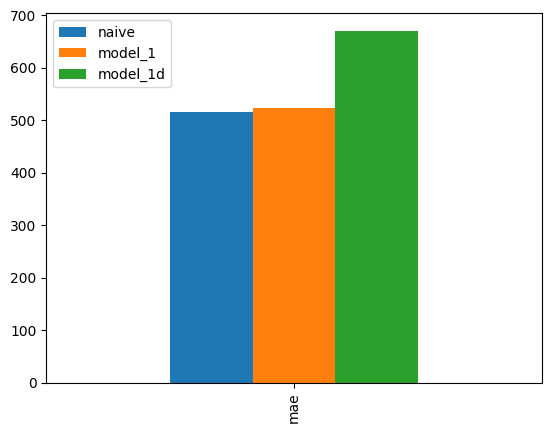

In [65]:
fig=df.plot(kind='bar')
plt.savefig('1vsnaive.png')


### Model 2
1D-CNN model

In [66]:
Horizon_3=1
Window_size_3=7

In [67]:
windows, labels= make_windows(prices, Window_size_3, Horizon_3)
len(windows)

3281

In [68]:
train_windows, test_windows, train_labels, test_labels = train_test_sets(windows, labels)
len(train_windows), len(test_windows)

(2624, 657)

In [69]:
train_windows[0].shape # We will use a lambda layer to reshape this

(7,)

In [70]:
train_windows[:4]

array([[350.833008, 352.381012, 346.72699 , 351.360992, 345.673004,
        326.855011, 319.785004],
       [352.381012, 346.72699 , 351.360992, 345.673004, 326.855011,
        319.785004, 311.178986],
       [346.72699 , 351.360992, 345.673004, 326.855011, 319.785004,
        311.178986, 317.618988],
       [351.360992, 345.673004, 326.855011, 319.785004, 311.178986,
        317.618988, 329.542999]])

In [71]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=256, kernel_size=3, padding="causal", activation="relu"), # Padding is causal because iur data is temporal
  layers.Dense(Horizon_3)
], name="model_2")

model_2.compile(loss="mae",
                optimizer='adam')

In [72]:
model_2.fit(train_windows,train_labels,batch_size=32, epochs=50,
            verbose=1,validation_data=(test_windows, test_labels),
            callbacks=[create_modelcheckpoint(model_2.name)])

Epoch 1/50
82/82 [==============================] - 4s 20ms/step - loss: 2179.1741 - val_loss: 1019.2220
Epoch 2/50
82/82 [==============================] - 1s 9ms/step - loss: 599.6757 - val_loss: 836.8215
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 564.4932 - val_loss: 848.8795
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 533.6400 - val_loss: 953.4644
Epoch 5/50
82/82 [==============================] - 1s 8ms/step - loss: 497.5951 - val_loss: 681.4454
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 479.3760 - val_loss: 1087.8047
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 468.3301 - val_loss: 749.1534
Epoch 8/50
82/82 [==============================] - 1s 8ms/step - loss: 455.6303 - val_loss: 671.4700
Epoch 9/50
82/82 [==============================] - 1s 9ms/step - loss: 473.1185 - val_loss: 587.9053
Epoch 10/50
82/82 [==============================] - 0s 3ms/step - loss: 422.2

In [73]:
model_2 = tf.keras.models.load_model("/content/modelling_experiments/model_2")
model_2.save('model_2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 522.3943


522.3943481445312

In [75]:
model_2_preds = make_preds(model_2, test_windows)

21/21 [==============================] - 0s 2ms/step


In [76]:
# Evaluate predictions
model_2_results = evalutes(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 522.39435,
 'mape': 1.9119524,
 'mse': 667069.94,
 'rmse': 816.74347,
 'mase': 1.0136019}

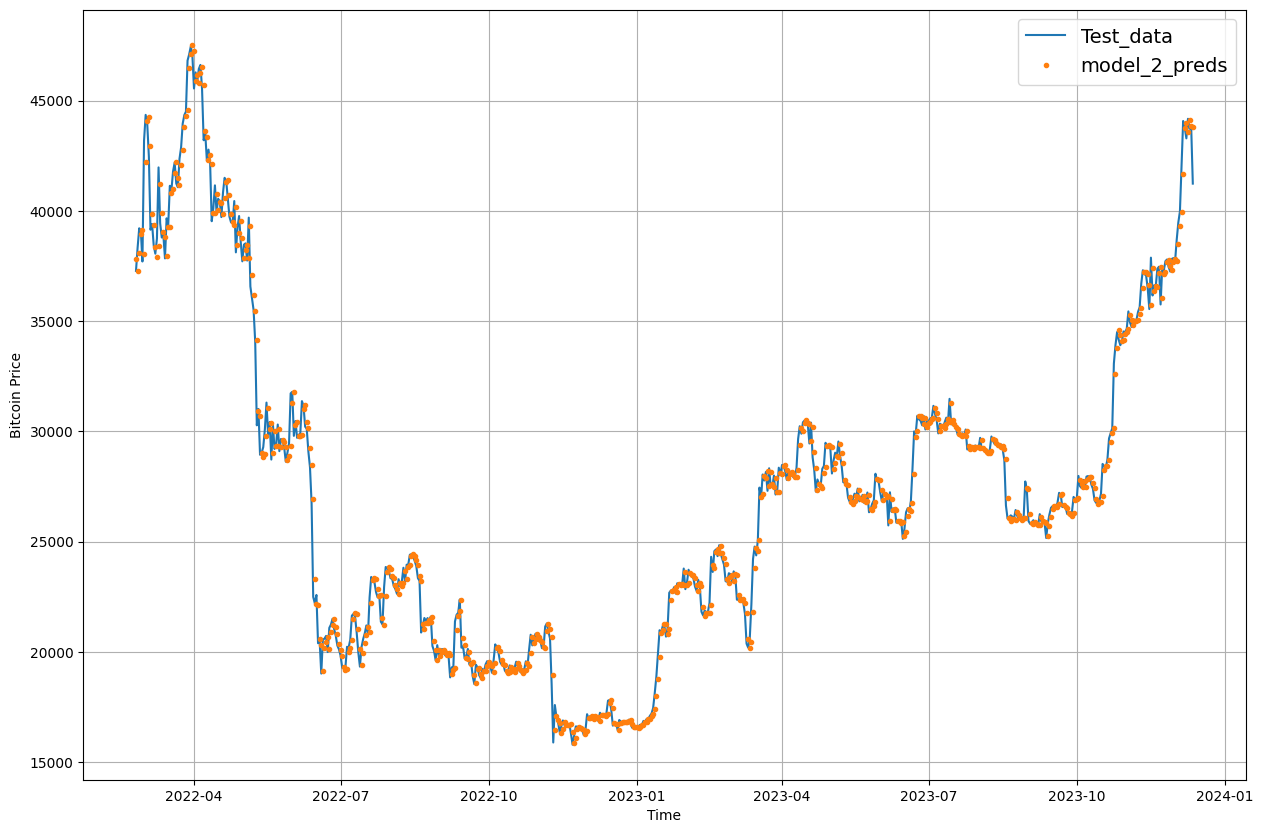

In [77]:
plt.figure(figsize=(15, 10))
plot_ts(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],  label="Test_data")
plot_ts(timesteps=X_test[-len(test_windows):], values=model_2_preds, format=".", label="model_2_preds")
plt.savefig('model_2_preds.png')

### Model 3 (RNN LSTM MODEL)

In [78]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(Window_size_3))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
output = layers.Dense(Horizon_3)(x)
model_3 = tf.keras.Model(inputs=inputs, outputs=output, name="model_3")


In [79]:
model_3.compile(loss="mae",optimizer='adam')

In [80]:
model_3.fit(train_windows,train_labels,epochs=50,verbose=1,batch_size=50,validation_data=(test_windows, test_labels),
            callbacks=[create_modelcheckpoint(model_3.name)])

Epoch 1/50
53/53 [==============================] - 5s 51ms/step - loss: 11760.3281 - val_loss: 25523.3906
Epoch 2/50
53/53 [==============================] - 3s 49ms/step - loss: 7063.5254 - val_loss: 3205.9067
Epoch 3/50
53/53 [==============================] - 3s 51ms/step - loss: 683.6729 - val_loss: 956.1747
Epoch 4/50
53/53 [==============================] - 0s 9ms/step - loss: 628.1186 - val_loss: 1410.0221
Epoch 5/50
53/53 [==============================] - 0s 9ms/step - loss: 621.2716 - val_loss: 957.9801
Epoch 6/50
53/53 [==============================] - 2s 36ms/step - loss: 604.3336 - val_loss: 876.4455
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 589.7808 - val_loss: 880.3723
Epoch 8/50
53/53 [==============================] - 0s 6ms/step - loss: 595.5319 - val_loss: 953.2725
Epoch 9/50
53/53 [==============================] - 0s 6ms/step - loss: 589.3673 - val_loss: 933.5400
Epoch 10/50
53/53 [==============================] - 0s 6ms/step - loss

In [81]:
model_3 = tf.keras.models.load_model('/content/modelling_experiments/model_3')
model_3.evaluate(test_windows, test_labels)
model_3.save('model_3.h5')

21/21 [==============================] - 0s 2ms/step - loss: 579.8766


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
# Make predictions
model_3_preds = make_preds(model_3, test_windows)

21/21 [==============================] - 0s 2ms/step


In [83]:
model_3_results = evalutes(y_true=tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

{'mae': 579.8766,
 'mape': 2.1249022,
 'mse': 783754.94,
 'rmse': 885.2994,
 'mase': 1.1251347}

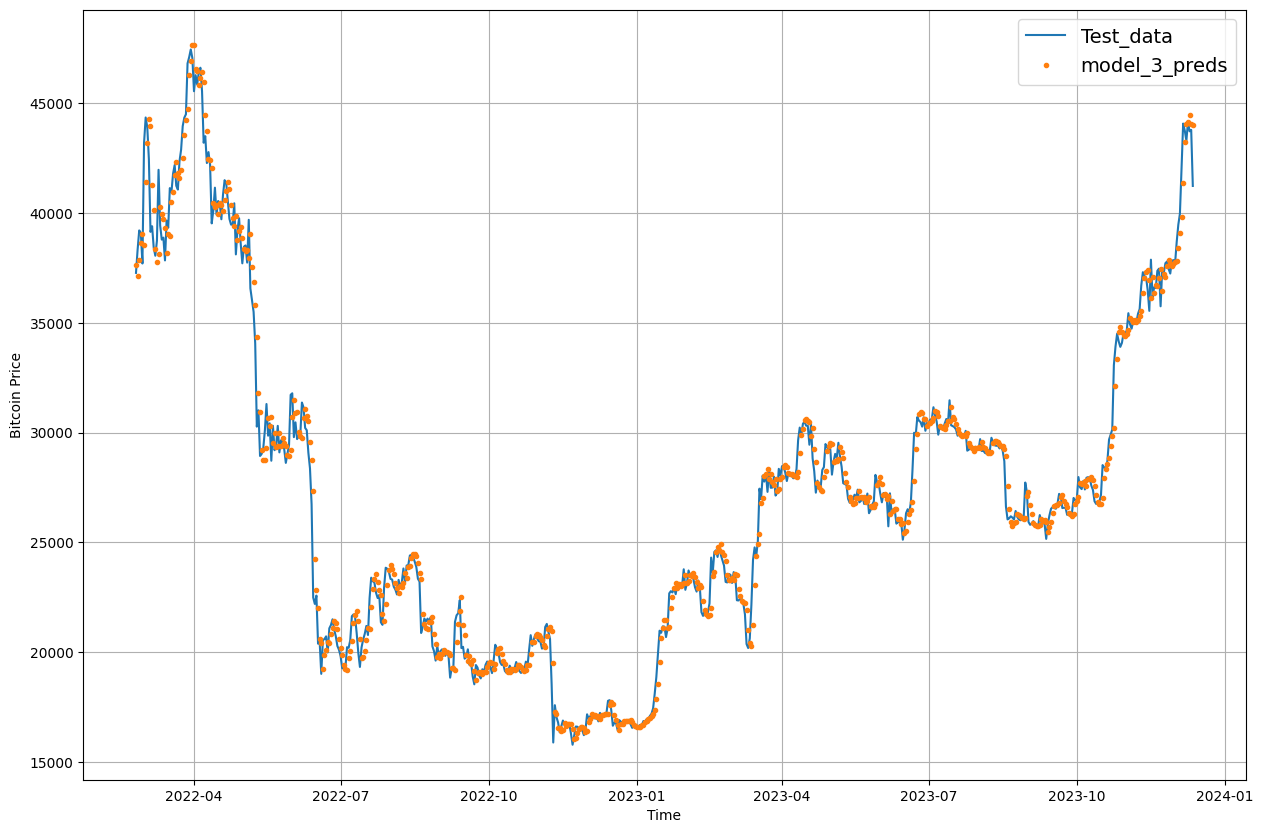

In [84]:
plt.figure(figsize=(15, 10))
plot_ts(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],  label="Test_data")
plot_ts(timesteps=X_test[-len(test_windows):], values=model_3_preds, format=".", label="model_3_preds")
plt.savefig('model_3_preds.png')

### Model-4(Multivariate Data Model)

In [85]:
btc_price.head()

,Price
Date,
2014-12-12,350.833008
2014-12-13,352.381012
2014-12-14,346.726990
2014-12-15,351.360992
2014-12-16,345.673004


In [86]:
# Adding halving events to our dataset
block_reward2=25
block_reward3=12.5
block_reward4=6.25


In [87]:
# Block reward dates
block_reward2_datetime = np.datetime64("2012-11-28")
block_reward3_datetime = np.datetime64("2016-07-09")
block_reward4_datetime = np.datetime64("2020-05-11")

In [88]:
block_reward2_days = (block_reward3_datetime - btc_price.index[0]).days
block_reward3_days = (block_reward4_datetime - btc_price.index[0]).days
block_reward2_days, block_reward3_days

(575, 1977)

In [89]:
btc_price_block = btc_price.copy()
btc_price_block["block_reward"] = None
btc_price_block

,Price,block_reward
Date,,
2014-12-12,350.833008,None
2014-12-13,352.381012,None
2014-12-14,346.726990,None
2014-12-15,351.360992,None
2014-12-16,345.673004,None
...,...,...
2023-12-08,43293.136719,None
2023-12-09,44180.019531,None
2023-12-10,43728.382813,None


In [90]:
btc_price_block.iloc[:block_reward2_days, -1] = block_reward2
btc_price_block.iloc[block_reward2_days:block_reward3_days, -1] = block_reward3
btc_price_block.iloc[block_reward3_days:, -1] = block_reward4
btc_price_block.tail()

,Price,block_reward
Date,,
2023-12-08,43293.136719,6.25
2023-12-09,44180.019531,6.25
2023-12-10,43728.382813,6.25
2023-12-11,43792.019531,6.25
2023-12-12,41238.734375,6.25


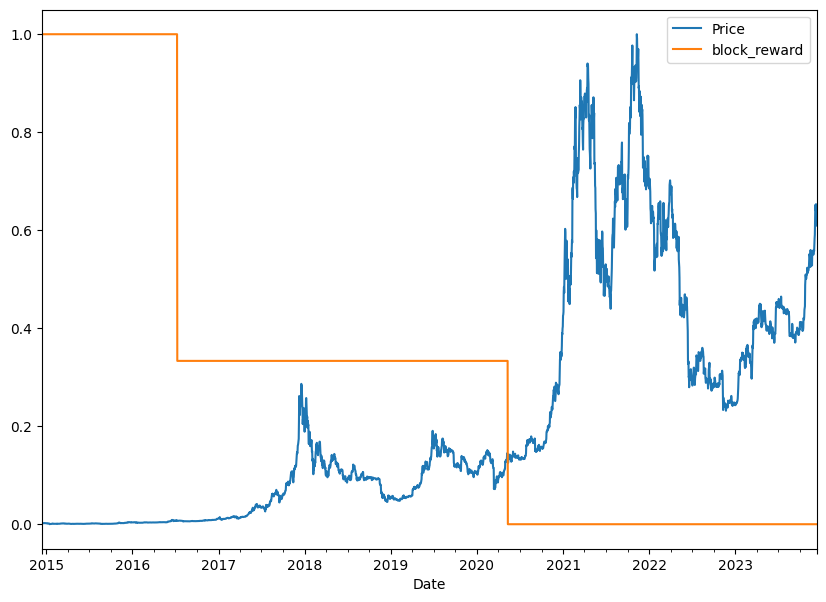

In [102]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(btc_price_block[["Price", "block_reward"]]),
                                     columns=btc_price_block.columns,
                                     index=btc_price_block.index)
scaled_price_block_df.plot(figsize=(10, 7));
plt.savefig('blockreward.png')

In [92]:
Horizon_4 = 1
Window_size_4 = 7

In [93]:
btc_price_windowed = btc_price_block.copy()
for i in range(Window_size_4):
  btc_price_windowed[f"Price+{i+1}"] = btc_price_windowed["Price"].shift(periods=i+1)

In [94]:
btc_price_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-12-12,350.833008,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-13,352.381012,25,350.833008,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-14,346.726990,25,352.381012,350.833008,NaN,NaN,NaN,NaN,NaN
2014-12-15,351.360992,25,346.726990,352.381012,350.833008,NaN,NaN,NaN,NaN
2014-12-16,345.673004,25,351.360992,346.726990,352.381012,350.833008,NaN,NaN,NaN


In [95]:
X = btc_price_windowed.dropna()
X.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-12-19,311.178986,25,319.785004,326.855011,345.673004,351.360992,346.726990,352.381012,350.833008
2014-12-20,317.618988,25,311.178986,319.785004,326.855011,345.673004,351.360992,346.726990,352.381012
2014-12-21,329.542999,25,317.618988,311.178986,319.785004,326.855011,345.673004,351.360992,346.726990
2014-12-22,321.067993,25,329.542999,317.618988,311.178986,319.785004,326.855011,345.673004,351.360992
2014-12-23,332.016998,25,321.067993,329.542999,317.618988,311.178986,319.785004,326.855011,345.673004


In [96]:
X.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2023-12-08,43293.136719,6.25,43769.132813,44080.023438,41986.265625,39978.628906,39472.207031,38689.277344,37718.007813
2023-12-09,44180.019531,6.25,43293.136719,43769.132813,44080.023438,41986.265625,39978.628906,39472.207031,38689.277344
2023-12-10,43728.382813,6.25,44180.019531,43293.136719,43769.132813,44080.023438,41986.265625,39978.628906,39472.207031
2023-12-11,43792.019531,6.25,43728.382813,44180.019531,43293.136719,43769.132813,44080.023438,41986.265625,39978.628906
2023-12-12,41238.734375,6.25,43792.019531,43728.382813,44180.019531,43293.136719,43769.132813,44080.023438,41986.265625


In [97]:
X = X.drop("Price", axis=1).astype(np.float32)
y = btc_price_windowed["Price"].astype(np.float32)

In [98]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-12-19,25.0,319.785004,326.855011,345.673004,351.360992,346.726990,352.381012,350.833008
2014-12-20,25.0,311.178986,319.785004,326.855011,345.673004,351.360992,346.726990,352.381012
2014-12-21,25.0,317.618988,311.178986,319.785004,326.855011,345.673004,351.360992,346.726990
2014-12-22,25.0,329.542999,317.618988,311.178986,319.785004,326.855011,345.673004,351.360992
2014-12-23,25.0,321.067993,329.542999,317.618988,311.178986,319.785004,326.855011,345.673004


In [99]:
y.head()

Date
2014-12-12    350.833008
2014-12-13    352.381012
2014-12-14    346.726990
2014-12-15    351.360992
2014-12-16    345.673004
Name: Price, dtype: float32

In [100]:
y.tail()

Date
2023-12-08    43293.136719
2023-12-09    44180.019531
2023-12-10    43728.382812
2023-12-11    43792.019531
2023-12-12    41238.734375
Name: Price, dtype: float32

In [101]:
#splitting the dataset
split_size = int(len(X) * 0.8)
X_train = X[:split_size]
y_train= y[:split_size]
X_test = X[split_size:]
y_test = y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2624, 2624, 657, 664)

In [122]:
#building the model
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(Horizon_4)
], name='model_4')

model_4.compile(loss='mae', optimizer='adam')



In [123]:
model_4.fit(X_train, y_train,epochs=50, batch_size=32,validation_data=(X_test, y_test),
            callbacks=[create_modelcheckpoint(model_4.name)])

Epoch 1/50
82/82 [==============================] - 2s 12ms/step - loss: 1375.7288 - val_loss: 1203.5885
Epoch 2/50
82/82 [==============================] - 1s 10ms/step - loss: 481.7081 - val_loss: 784.8193
Epoch 3/50
82/82 [==============================] - 0s 4ms/step - loss: 536.7966 - val_loss: 893.9726
Epoch 4/50
82/82 [==============================] - 0s 4ms/step - loss: 591.1940 - val_loss: 2037.5051
Epoch 5/50
82/82 [==============================] - 1s 10ms/step - loss: 480.7372 - val_loss: 583.5554
Epoch 6/50
82/82 [==============================] - 0s 4ms/step - loss: 476.5771 - val_loss: 1087.4597
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 487.5448 - val_loss: 804.7889
Epoch 8/50
82/82 [==============================] - 0s 3ms/step - loss: 406.9750 - val_loss: 742.6054
Epoch 9/50
82/82 [==============================] - 0s 4ms/step - loss: 518.7922 - val_loss: 920.7584
Epoch 10/50
82/82 [==============================] - 1s 13ms/step - loss: 5

In [124]:
model_4 = tf.keras.models.load_model("/content/modelling_experiments/model_4")
model_4.evaluate(X_test, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 526.2498


526.249755859375

In [125]:
model_4_preds = tf.squeeze(model_4.predict(X_test))

21/21 [==============================] - 0s 2ms/step


In [126]:
model_4_results = evalutes(y_true=y_test,y_pred=model_4_preds)
model_4_results


{'mae': 526.24976,
 'mape': 1.9224637,
 'mse': 679441.44,
 'rmse': 824.28235,
 'mase': 1.0210825}

### Model-5 (N-beats Algorithm)
Paper- https://arxiv.org/pdf/1905.10437.pdf

In [106]:
Horizon_5 = 1
Window_size_5 = 7

In [107]:
btc_price.head()

,Price
Date,
2014-12-12,350.833008
2014-12-13,352.381012
2014-12-14,346.726990
2014-12-15,351.360992
2014-12-16,345.673004


In [108]:
btc_price_nbeats = btc_price.copy()
for i in range(Window_size_5):
  btc_price_nbeats[f"Price+{i+1}"] = btc_price_nbeats["Price"].shift(periods=i+1)
btc_price_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-12-19,311.178986,319.785004,326.855011,345.673004,351.360992,346.726990,352.381012,350.833008
2014-12-20,317.618988,311.178986,319.785004,326.855011,345.673004,351.360992,346.726990,352.381012
2014-12-21,329.542999,317.618988,311.178986,319.785004,326.855011,345.673004,351.360992,346.726990
2014-12-22,321.067993,329.542999,317.618988,311.178986,319.785004,326.855011,345.673004,351.360992
2014-12-23,332.016998,321.067993,329.542999,317.618988,311.178986,319.785004,326.855011,345.673004


In [109]:
btc_price_nbeats.tail()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2023-12-08,43293.136719,43769.132813,44080.023438,41986.265625,39978.628906,39472.207031,38689.277344,37718.007813
2023-12-09,44180.019531,43293.136719,43769.132813,44080.023438,41986.265625,39978.628906,39472.207031,38689.277344
2023-12-10,43728.382813,44180.019531,43293.136719,43769.132813,44080.023438,41986.265625,39978.628906,39472.207031
2023-12-11,43792.019531,43728.382813,44180.019531,43293.136719,43769.132813,44080.023438,41986.265625,39978.628906
2023-12-12,41238.734375,43792.019531,43728.382813,44180.019531,43293.136719,43769.132813,44080.023438,41986.265625


In [110]:
X = btc_price_nbeats.dropna().drop("Price", axis=1)
y = btc_price_nbeats.dropna()["Price"]

In [111]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2624, 2624, 657, 657)

In [112]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

#### Creating the N-beats layer

In [113]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, input_size: int, theta_size: int, horizon: int, n_neurons: int, n_layers: int, **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [114]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=Window_size_5,
                                       theta_size=Window_size_5+Horizon_5,
                                       horizon=Horizon_5,
                                       n_neurons=128,
                                       n_layers=4)

In [115]:
dummy_inputs = tf.expand_dims(tf.range(Window_size_5) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [116]:
# Checking
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [ 0.22797093  0.25305098 -0.0198514   0.4324925  -0.12828262  0.19755423
  0.02866785]
Forecast: 0.037367045879364014


In [117]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = Window_size_5 * Horizon_5
THETA_SIZE = INPUT_SIZE + Horizon_5

INPUT_SIZE, THETA_SIZE

(7, 8)

In [119]:
#  Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(INPUT_SIZE, THETA_SIZE, Horizon_5,N_NEURONS, N_LAYERS, name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")


for i, _ in enumerate(range(N_STACKS-1)):


  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,theta_size=THETA_SIZE,horizon=Horizon_5,n_neurons=N_NEURONS,n_layers=N_LAYERS,name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")


In [120]:

model_5 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_5")


model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])


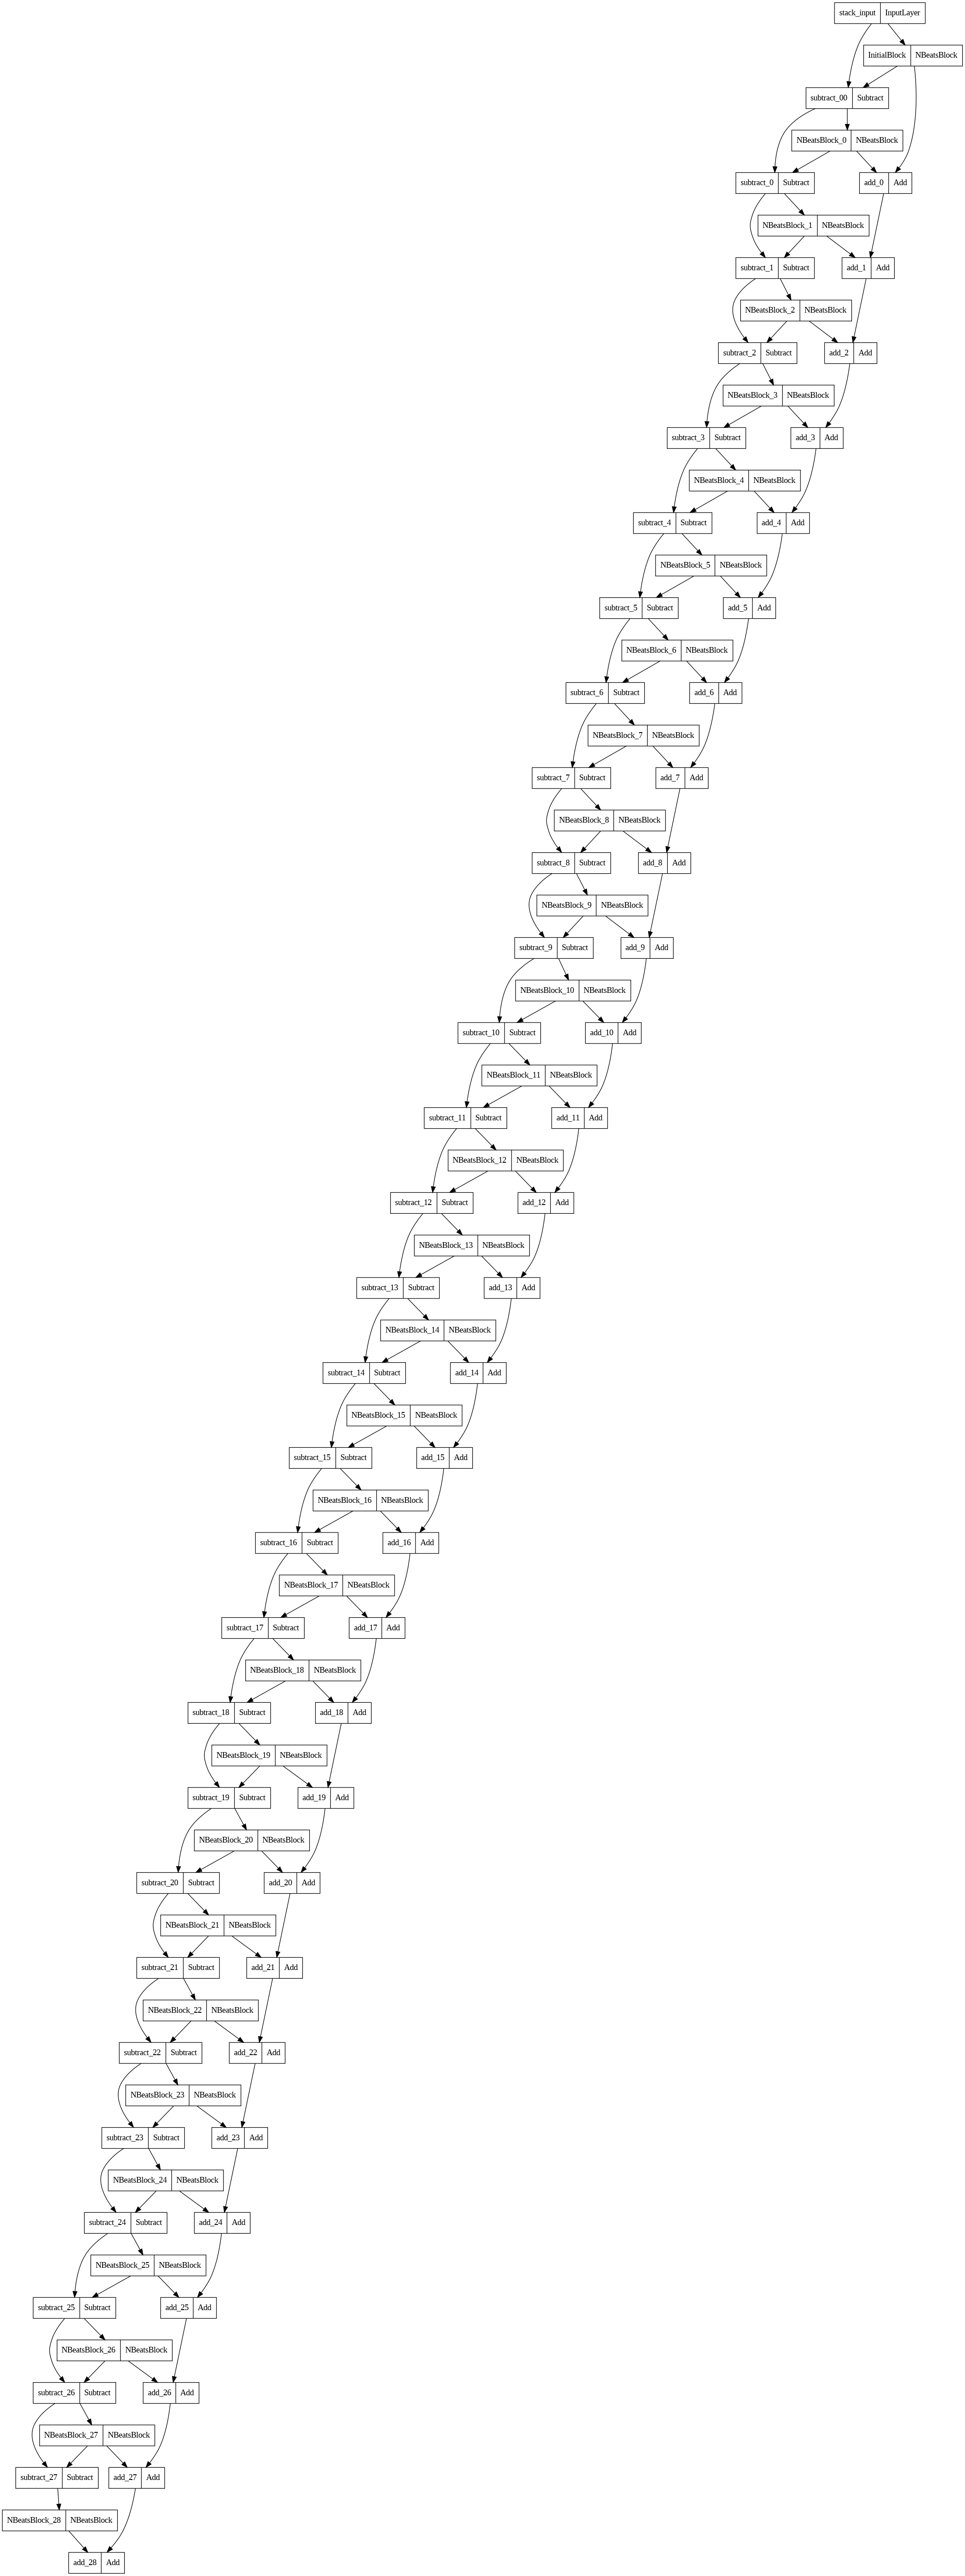

In [127]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [128]:
model_5.fit(train_dataset, epochs=N_EPOCHS,validation_data=test_dataset,verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])



Epoch 232: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 332: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [129]:
model_5.evaluate(test_dataset)

1/1 [==============================] - 0s 40ms/step - loss: 542.9496 - mae: 542.9496 - mse: 717480.6250


[542.9496459960938, 542.9496459960938, 717480.625]

In [130]:
model_5_preds = make_preds(model_5, test_dataset)

1/1 [==============================] - 2s 2s/step


In [131]:
model_5_results = evalutes(y_test,model_5_preds)
model_5_results

{'mae': 542.94965,
 'mape': 1.9790785,
 'mse': 717480.6,
 'rmse': 847.0423,
 'mase': 1.0534853}

In [132]:
naive_results

{'mae': 516.13196,
 'mape': 1.8850052,
 'mse': 654502.3,
 'rmse': 809.0132,
 'mase': 1.001451}

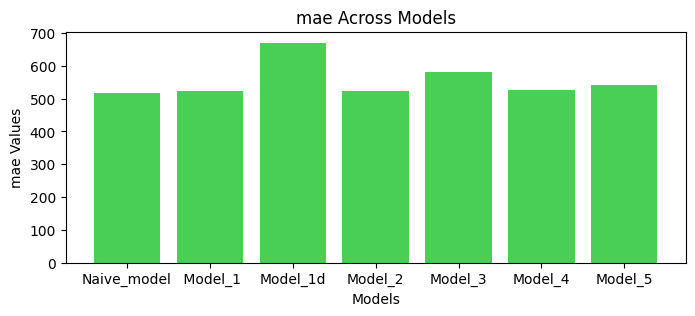

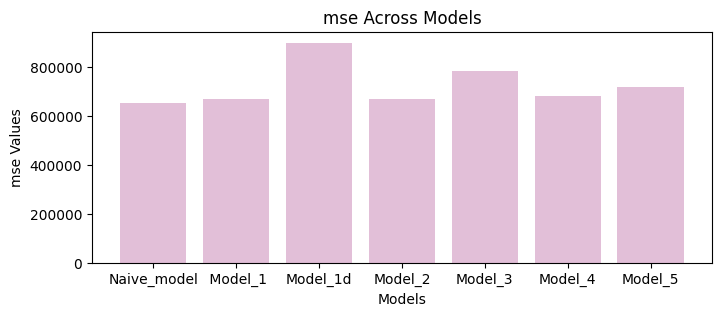

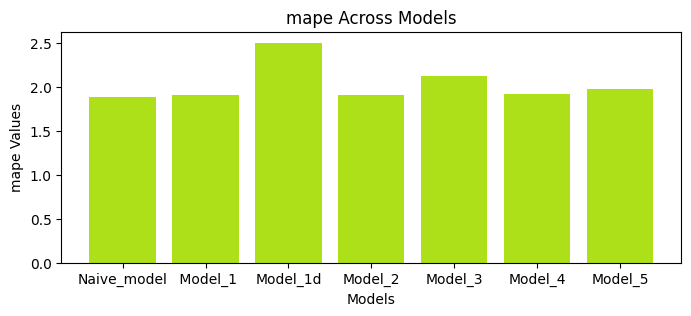

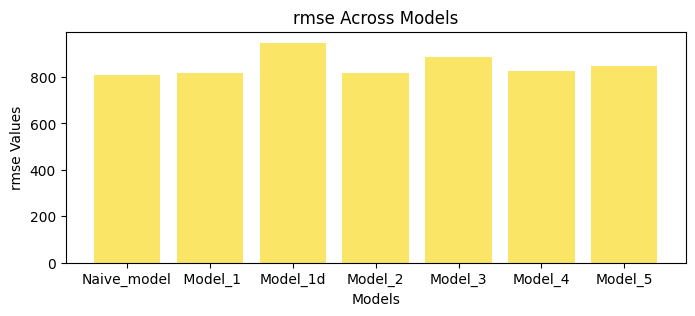

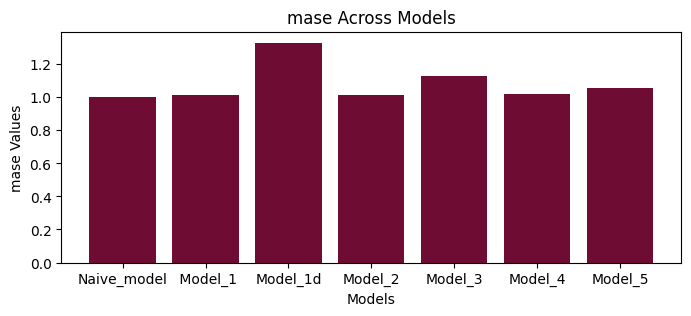

<Figure size 640x480 with 0 Axes>

In [134]:
def plot_metrics(models_metrics, metric_name):
    model_names = list(models_metrics.keys())
    metric_values = [model_metrics[metric_name] for model_metrics in models_metrics.values()]

    plt.figure(figsize=(8, 3))
    plt.bar(model_names, metric_values, color=np.random.rand(3,))
    plt.title(f'{metric_name} Across Models')
    plt.xlabel('Models')
    plt.ylabel(f'{metric_name} Values')
    plt.show()

models_metrics = {"Naive_model": naive_results, ' Model_1': model_1_results, 'Model_1d': model_1d_results, 'Model_2': model_2_results, 'Model_3': model_3_results,'Model_4':model_4_results, 'Model_5': model_5_results}

metrics_to_plot = ['mae', 'mse', 'mape', 'rmse', 'mase']

for metric in metrics_to_plot:
    plot_metrics(models_metrics, metric)
plt.savefig('comparisonofallmodels.png')
